In [45]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
nomes_m = pd.read_json('https://raw.githubusercontent.com/guilhermeonrails/nomes_ibge/main/nomes-m.json')
nomes_f = pd.read_json('https://raw.githubusercontent.com/guilhermeonrails/nomes_ibge/main/nomes-f.json')

In [4]:
nomes_m.head(10)

,nome,regiao,freq,rank,sexo
0,JOSE,0,5732508,1,M
1,JOAO,0,2971935,2,M
2,ANTONIO,0,2567494,3,M
3,FRANCISCO,0,1765197,4,M
4,CARLOS,0,1483121,5,M
5,PAULO,0,1417907,6,M
6,PEDRO,0,1213557,7,M
7,LUCAS,0,1116818,8,M
8,LUIZ,0,1102927,9,M
9,MARCOS,0,1101126,10,M


In [5]:
nomes_f.head(10)

,nome,regiao,freq,rank,sexo
0,MARIA,0,11694738,1,F
1,ANA,0,3079729,2,F
2,FRANCISCA,0,721637,3,F
3,ANTONIA,0,588783,4,F
4,ADRIANA,0,565621,5,F
5,JULIANA,0,562589,6,F
6,MARCIA,0,551855,7,F
7,FERNANDA,0,531607,8,F
8,PATRICIA,0,529446,9,F
9,ALINE,0,509869,10,F


## Sorteio

In [7]:
nomes_m.sample(7)

,nome,regiao,freq,rank,sexo
9,MARCOS,0,1101126,10,M
112,VANDERLEI,0,126592,113,M
97,OSVALDO,0,146986,98,M
136,NILTON,0,104846,137,M
18,RAIMUNDO,0,611174,19,M
25,LEONARDO,0,544258,26,M
10,LUIS,0,931530,11,M


## Tamanho

In [8]:
print(f'Quantidade de dados em nomes_m: {nomes_m.shape[0]}')
print(f'Quantidade de dados em nomes_f: {nomes_f.shape[0]}')

Quantidade de dados em nomes_m: 200
Quantidade de dados em nomes_f: 200


## Juntando dados

In [9]:
frames = [nomes_f, nomes_m]

frames

[          nome  regiao      freq  rank sexo
 0        MARIA       0  11694738     1    F
 1          ANA       0   3079729     2    F
 2    FRANCISCA       0    721637     3    F
 3      ANTONIA       0    588783     4    F
 4      ADRIANA       0    565621     5    F
 ..         ...     ...       ...   ...  ...
 195     ROSANE       0     82203   196    F
 196    IVONETE       0     81878   197    F
 197    LUCIANE       0     81230   198    F
 198    ISADORA       0     81100   199    F
 199      NILZA       0     80128   200    F
 
 [200 rows x 5 columns],
           nome  regiao     freq  rank sexo
 0         JOSE       0  5732508     1    M
 1         JOAO       0  2971935     2    M
 2      ANTONIO       0  2567494     3    M
 3    FRANCISCO       0  1765197     4    M
 4       CARLOS       0  1483121     5    M
 ..         ...     ...      ...   ...  ...
 195     WALTER       0    67207   196    M
 196    ARLINDO       0    66669   197    M
 197    MICHAEL       0    65736   19

In [10]:
nomes = pd.concat(frames)['nome']

nomes

0          MARIA
1            ANA
2      FRANCISCA
3        ANTONIA
4        ADRIANA
         ...    
195       WALTER
196      ARLINDO
197      MICHAEL
198       ALVARO
199      GEOVANE
Name: nome, Length: 400, dtype: object

In [12]:
nomes = nomes.to_frame()

nomes

,nome
0,MARIA
1,ANA
2,FRANCISCA
3,ANTONIA
4,ADRIANA
...,...
195,WALTER
196,ARLINDO
197,MICHAEL
198,ALVARO


In [14]:
np.random.seed(73)

In [15]:
total_alunos = nomes_m.shape[0] + nomes_f.shape[0]

total_alunos

400

In [16]:
nomes['id_aluno'] = np.random.permutation(total_alunos) + 1

nomes

,nome,id_aluno
0,MARIA,387
1,ANA,8
2,FRANCISCA,359
3,ANTONIA,237
4,ADRIANA,336
...,...,...
195,WALTER,324
196,ARLINDO,393
197,MICHAEL,273
198,ALVARO,395


In [18]:
len(nomes['id_aluno'].unique())

400

In [20]:
dominios = ['@dominiodoemail.com.br', '@servicodoemail.com']
nomes['dominio'] = np.random.choice(dominios, total_alunos)

nomes

,nome,id_aluno,dominio
0,MARIA,387,@servicodoemail.com
1,ANA,8,@dominiodoemail.com.br
2,FRANCISCA,359,@dominiodoemail.com.br
3,ANTONIA,237,@servicodoemail.com
4,ADRIANA,336,@servicodoemail.com
...,...,...,...
195,WALTER,324,@dominiodoemail.com.br
196,ARLINDO,393,@dominiodoemail.com.br
197,MICHAEL,273,@dominiodoemail.com.br
198,ALVARO,395,@dominiodoemail.com.br


In [27]:
nomes['email'] = nomes['nome'].str.cat(nomes['dominio']).str.lower()

nomes

,nome,id_aluno,dominio,email
0,MARIA,387,@servicodoemail.com,maria@servicodoemail.com
1,ANA,8,@dominiodoemail.com.br,ana@dominiodoemail.com.br
2,FRANCISCA,359,@dominiodoemail.com.br,francisca@dominiodoemail.com.br
3,ANTONIA,237,@servicodoemail.com,antonia@servicodoemail.com
4,ADRIANA,336,@servicodoemail.com,adriana@servicodoemail.com
...,...,...,...,...
195,WALTER,324,@dominiodoemail.com.br,walter@dominiodoemail.com.br
196,ARLINDO,393,@dominiodoemail.com.br,arlindo@dominiodoemail.com.br
197,MICHAEL,273,@dominiodoemail.com.br,michael@dominiodoemail.com.br
198,ALVARO,395,@dominiodoemail.com.br,alvaro@dominiodoemail.com.br


In [28]:
cursos = pd.read_html('https://tabela-cursos.herokuapp.com/index.html')

cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [29]:
cursos = cursos[0]

In [31]:
type(cursos)

pandas.core.frame.DataFrame

In [32]:
cursos.rename(columns={'Nome do curso': 'nome_do_curso'}, inplace=True)

In [34]:
cursos.head()

,nome_do_curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


In [35]:
cursos['id'] = cursos.index + 1

In [37]:
cursos.head()

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [39]:
cursos.set_index('id', inplace=True)

cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [43]:
nomes['matriculas'] = np.ceil(np.random.exponential(size=total_alunos)).astype(int)

nomes

,nome,id_aluno,dominio,email,matriculas
0,MARIA,387,@servicodoemail.com,maria@servicodoemail.com,1
1,ANA,8,@dominiodoemail.com.br,ana@dominiodoemail.com.br,1
2,FRANCISCA,359,@dominiodoemail.com.br,francisca@dominiodoemail.com.br,2
3,ANTONIA,237,@servicodoemail.com,antonia@servicodoemail.com,2
4,ADRIANA,336,@servicodoemail.com,adriana@servicodoemail.com,2
...,...,...,...,...,...
195,WALTER,324,@dominiodoemail.com.br,walter@dominiodoemail.com.br,1
196,ARLINDO,393,@dominiodoemail.com.br,arlindo@dominiodoemail.com.br,1
197,MICHAEL,273,@dominiodoemail.com.br,michael@dominiodoemail.com.br,1
198,ALVARO,395,@dominiodoemail.com.br,alvaro@dominiodoemail.com.br,1


In [44]:
nomes['matriculas'].describe()

count    400.000000
mean       1.517500
std        0.822426
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        5.000000
Name: matriculas, dtype: float64

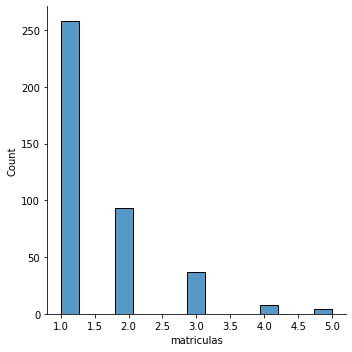

In [46]:
sns.displot(nomes['matriculas'])

In [48]:
nomes['matriculas'].value_counts()

1    258
2     93
3     37
4      8
5      4
Name: matriculas, dtype: int64

# Lendo e escrevendo SQL

In [50]:
from sqlalchemy import create_engine, MetaData, Table, inspect

In [52]:
engine = create_engine('sqlite:///:memory:')

engine

Engine(sqlite:///:memory:)

In [53]:
type(engine)

sqlalchemy.engine.base.Engine

In [55]:
nomes.to_sql('matriculas', engine)

In [56]:
inspector = inspect(engine)

In [57]:
inspector.get_table_names()

['matriculas']

In [ ]:
query = 'select * from matriculas where '